In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.5f}'.format
pd.options.mode.chained_assignment = None

# 1. Dataset

Vamos a trabajar con un dataset información de distintos modelos de autos

El dataset contiene las siguientes variables:

* **mpg**: millas por galon
* **cylinders**: cantidad de cilindros
* **displacement**: cilindrada (volumen util de los cilindros)
* **horsepower**: caballos de fuerza
* **weight**: peso
* **acceleration**: aceleración
* **model_year**: año del modelo
* **origin**: país de origen
* **name**:nombre del modelo

In [ ]:
# Cargamos el dataset desde el link
autos = sns.load_dataset('mpg')
# Vemos 10 registros al azar
autos.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
286,17.60000,8,302.00000,129.00000,3725,13.40000,79,usa,ford ltd landau
70,13.00000,8,400.00000,190.00000,4422,12.50000,72,usa,chrysler newport royal
109,21.00000,4,140.00000,72.00000,2401,19.50000,73,usa,chevrolet vega
121,15.00000,8,318.00000,150.00000,3399,11.00000,73,usa,dodge dart custom
336,23.60000,4,140.00000,nan,2905,14.30000,80,usa,ford mustang cobra
241,22.00000,6,146.00000,97.00000,2815,14.50000,77,japan,datsun 810
330,40.90000,4,85.00000,nan,1835,17.30000,80,europe,renault lecar deluxe
133,16.00000,6,250.00000,100.00000,3781,17.00000,74,usa,chevrolet chevelle malibu classic
306,28.80000,6,173.00000,115.00000,2595,11.30000,79,usa,chevrolet citation
195,29.00000,4,85.00000,52.00000,2035,22.20000,76,usa,chevrolet chevette


In [ ]:
# Cantidad de registros
autos.shape

(398, 9)

# 2. Objetivo: detectar autos atípicos

Nuestro cliente es una concesionaria que se especializa en autos antiguos y quiere saber cuales de estos autos son atípicos en las variables de mpg, horsepower, weight y acceleration

In [ ]:
# Variables relevantes
lista_variables = ['mpg', 'horsepower', 'weight', 'acceleration']

## 2.1 Escala de las variables

Evaluemos la escala de las variables y su distribución

Primero, observemos los estadísticos descriptivos de las variables

In [ ]:
# Observar la distribución de las variables
autos[lista_variables].describe()

,mpg,horsepower,weight,acceleration
count,398.00000,392.00000,398.00000,398.00000
mean,23.51457,104.46939,2970.42462,15.56809
std,7.81598,38.49116,846.84177,2.75769
min,9.00000,46.00000,1613.00000,8.00000
25%,17.50000,75.00000,2223.75000,13.82500
50%,23.00000,93.50000,2803.50000,15.50000
75%,29.00000,126.00000,3608.00000,17.17500
max,46.60000,230.00000,5140.00000,24.80000


In [ ]:
autos = autos[autos['horsepower'].isnull()]

In [ ]:
autos

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.00000,4,98.00000,nan,2046,19.00000,71,usa,ford pinto
126,21.00000,6,200.00000,nan,2875,17.00000,74,usa,ford maverick
330,40.90000,4,85.00000,nan,1835,17.30000,80,europe,renault lecar deluxe
336,23.60000,4,140.00000,nan,2905,14.30000,80,usa,ford mustang cobra
354,34.50000,4,100.00000,nan,2320,15.80000,81,europe,renault 18i
374,23.00000,4,151.00000,nan,3035,20.50000,82,usa,amc concord dl


¿Qué observamos con estos datos?

Son todas variables que se miden en unidades distintas. Las variables de peso y caballos de fuerza parecen tener un rango bastante amplio.



# 3. Detección de outliers univariados

El método para detectar outliers que hemos visto consiste en estandarizar la variable y catalogar como outlier a aquellas observaciones cuyo z-score que superen, en valor absoluto, un límite (usualmente de 3).

Entonces el primer paso será estandarizar las variables con la fórmula:

$ x_e = \frac{x-\overline{X}}{\sigma_X}$


In [ ]:
# Funcion para estandarizar
def estandarizar_var(X):
  promedio = np.mean(X)
  desvio = np.std(X)
  X_estandarizada = (X-promedio)/desvio
  return X_estandarizada

In [ ]:
#Aplicar la función sobre las variables 
autos_estandarizadas = autos.loc[:,lista_variables].apply(estandarizar_var)
autos_estandarizadas['name'] = autos.name
autos_estandarizadas.head()

,mpg,horsepower,weight,acceleration,name
0,-0.70644,0.66413,0.63087,-1.29550,chevrolet chevelle malibu
1,-1.09075,1.57459,0.85433,-1.47704,buick skylark 320
2,-0.70644,1.18440,0.55047,-1.65858,plymouth satellite
3,-0.96265,1.18440,0.54692,-1.29550,amc rebel sst
4,-0.83454,0.92426,0.56584,-1.84012,ford torino


## 3.1 Gráficos

Realizamos los histogramas de las variables para observar su distribución

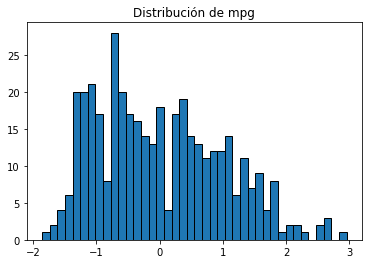

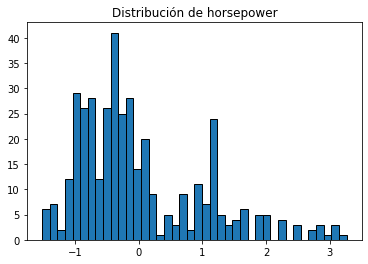

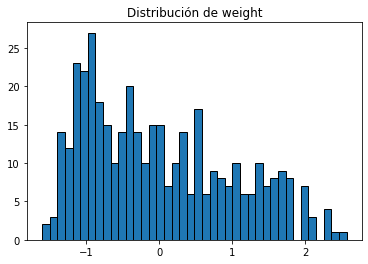

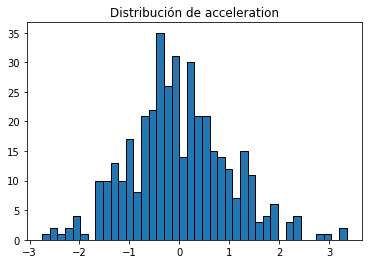

In [ ]:
# Realizamos un loop sobre las variables
for variable in lista_variables:
  # Histograma de la variable
  plt.hist(autos_estandarizadas[variable], bins=40, ec='black')
  # Titulo del gráfico
  plt.title(f"Distribución de {variable}")
  plt.show()

¿Qué observamos en estos gráficos?

La variable de aceleración tiene una distribución que se aproxima a una normal, las otras 3 variables no parecen aproximarse mucho a distribuciones normales. 

## 3.2 Criterio analitico

El cliente considera que para detectar autos atipicos en determinadas variables debe usarse un valor de 2.5.

Ahora hay que proceder a detectar cuáles autos son outliers en estas 4 variables. El resultado que se presenta debe incluir el nombre/modelo del auto y el valor real de la variable analizada (no el valor estandarizado)

In [ ]:
# Función para detectar outliers
def detectar_outliers(df_estandarizado, valor_limite, variable):
  outliers = df_estandarizado.loc[np.abs(df_estandarizado[variable])>valor_limite, 'name'].to_list()
  return outliers

In [ ]:
# Función para devolver el auto con el valor de la variable
def detectar_outliers_estadisticas(df, df_estandarizado, valor_limite, variable):
  outliers = detectar_outliers(df_estandarizado, valor_limite, variable)
  df_outliers = df.loc[df['name'].isin(outliers), ['name',variable]]
  return df_outliers

Detección de los outliers

In [ ]:
# Outliers de mpg
detectar_outliers_estadisticas(autos, autos_estandarizadas, 2.5, 'mpg')

,name,mpg
244,volkswagen rabbit custom diesel,43.10000
322,mazda glc,46.60000
325,vw rabbit c (diesel),44.30000
326,vw dasher (diesel),43.40000
329,honda civic 1500 gl,44.60000
394,vw pickup,44.00000


In [ ]:
# Outliers de acceleration
detectar_outliers_estadisticas(autos, autos_estandarizadas, 2.5, 'acceleration')

,name,acceleration
7,plymouth fury iii,8.50000
9,amc ambassador dpl,8.50000
11,plymouth 'cuda 340,8.00000
20,peugeot 504,17.50000
41,plymouth fury iii,13.00000
59,volkswagen type 3,23.50000
64,plymouth fury iii,13.50000
178,peugeot 504,17.00000
209,peugeot 504,21.90000
299,peugeot 504,24.80000


In [ ]:
# Outliers de horsepower
detectar_outliers_estadisticas(autos, autos_estandarizadas, 2.5, 'horsepower')

,name,horsepower
6,chevrolet impala,220.00000
7,plymouth fury iii,215.00000
8,pontiac catalina,225.00000
13,buick estate wagon (sw),225.00000
25,ford f250,215.00000
27,dodge d200,210.00000
38,chevrolet impala,165.00000
41,plymouth fury iii,150.00000
62,chevrolet impala,165.00000
63,pontiac catalina,175.00000


In [ ]:
# Outliers de weight
detectar_outliers_estadisticas(autos, autos_estandarizadas, 2.5, 'weight')

,name,weight
44,pontiac safari (sw),5140


# Opcional - Realizar un analisis multivariado

Buscar dos variables y realizar un analisis multivariado cruzando las dos variables y detectando los outliers de cada grupo!